## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [50]:
pokemon = pd.read_csv("../pokemon.csv", sep=",")
pokemon.fillna(pokemon.mean(), inplace=True)
penguins = pokemon[pokemon['type1'].notna()]

pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, random_state=42)

pokemon.head()

C:\Users\Jens\AppData\Local\Temp\ipykernel_48712\1556286363.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pokemon.fillna(pokemon.mean(), inplace=True)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [51]:
corr = pokemon.corr()
corr.style.background_gradient(cmap='coolwarm')

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732,-0.054175,0.062133,0.009994,-0.012398,-0.036474,0.035717,-0.059781,0.034897,-0.044982,0.004618,0.055352,-0.002342,-0.043802,-0.031344,-0.001549,0.027864
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976,-0.098849,0.187220,0.024155,0.065446,0.048039,-0.008391,0.018608,0.010589,-0.079434,0.009066,0.170849,0.132507,-0.000326,0.037634,-0.016013,0.136315
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549,0.138217,0.164773,-0.151915,0.069766,-0.023794,0.172547,0.164448,0.089721,0.055214,0.000872,0.039739,-0.047416,0.078123,0.125991,-0.025201,0.014844
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600,-0.104276,-0.061970,0.030411,-0.017137,-0.072433,-0.041584,0.003022,-0.035354,0.049106,-0.068552,0.022305,0.019193,0.111422,-0.101403,-0.063180,-0.023151
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937,0.207526,0.120594,-0.209323,0.098948,0.001655,0.146370,0.114993,0.129284,0.009831,0.176651,-0.010296,0.002754,0.065401,0.098210,0.150801,0.050165
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249,0.149123,-0.006359,-0.088722,0.048629,0.150424,0.010407,0.058524,0.109425,0.045678,0.018296,-0.118481,-0.044460,-0.050495,0.159761,0.000681,-0.059132
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635,-0.005762,-0.044802,0.007441,-0.061698,0.037921,-0.027136,-0.085422,-0.099242,-0.112148,0.052012,-0.088578,-0.019520,-0.079129,-0.043925,0.061157,-0.011073
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997,-0.002991,-0.091304,0.056480,-0.106586,-0.127950,0.019100,-0.072533,-0.060624,0.020980,0.020324,-0.111243,-0.079022,-0.043381,-0.125959,0.058204,-0.062214
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046,-0.034549,0.174115,-0.037205,0.114179,0.136490,0.059262,0.031626,-0.062052,0.051908,0.063189,0.233309,0.195439,-0.029007,0.046506,0.038027,0.170746
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968,0.036787,-0.064971,0.063475,-0.017340,0.139542,-0.039623,0.029533,0.056886,0.068575,-0.092353,-0.093899,-0.056427,-0.153618,0.048407,-0.107987,-0.070826


In [52]:
features= ['height_m', 'hp', 'base_total']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(pokemon_train[features], pokemon_train['speed'])

DecisionTreeRegressor(max_depth=3)

In [53]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

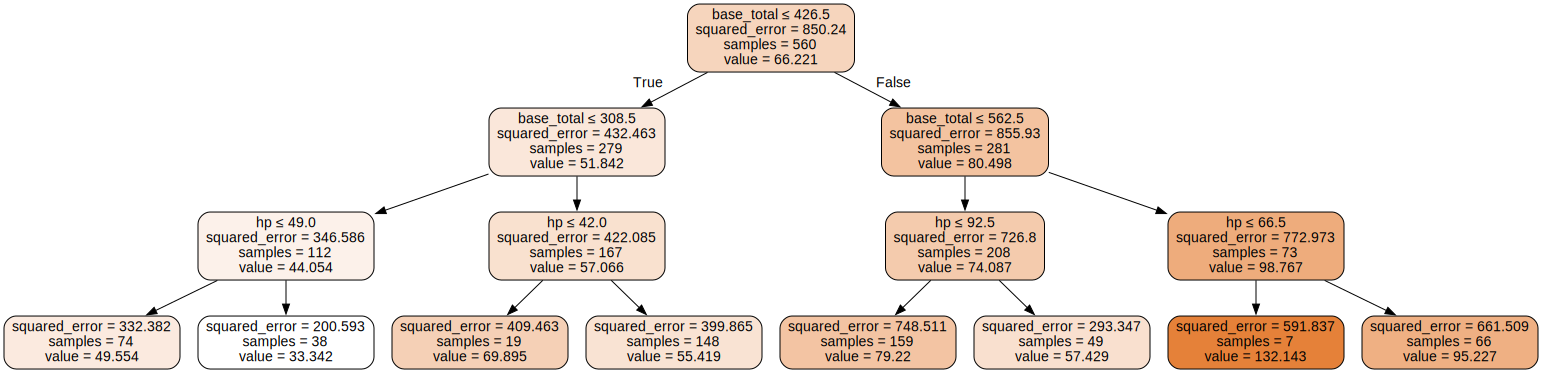

In [54]:
plot_tree_regression(dt_regression, features)

In [55]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [56]:
predictionsOnTrainset = dt_regression.predict(pokemon_train[features])
predictionsOnTestset = dt_regression.predict(pokemon_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, pokemon_train.speed)
rmseTest = calculate_rmse(predictionsOnTestset, pokemon_test.speed)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 22.37538493545603
RMSE on test set 24.882053058123287
